<a href="https://colab.research.google.com/github/shubhamksingh1/GANs/blob/main/Jupyter_Notebooks/SGAN_Pneumonia_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tensorflow version selection

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow
print(tensorflow.__version__)

1.15.2


### Kaggle Dataset Download into colab session

In [ ]:
# Install the Kaggle library

! pip install kaggle

In [ ]:
pwd

'/content'

In [ ]:
# Make a directory named “.kaggle”

! mkdir ~/.kaggle

In [ ]:
# Copy the “kaggle.json” into this new directory

# ! cp kaggle.json ~/.kaggle/
!cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
# Allocate the required permission for this file.

! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Downloading Competitions dataset:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
# ! kaggle competitions download <name-of-competition>


100% 2.29G/2.29G [00:09<00:00, 273MB/s]
100% 2.29G/2.29G [00:09<00:00, 252MB/s]


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip  \*.zip  && rm *.zip 

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

### Imports

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from keras import backend as K

from keras.datasets import mnist
from keras.layers import (Activation, BatchNormalization, Concatenate, Dense,
                          Dropout, Flatten, Input, Lambda, Reshape)
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical

Using TensorFlow backend.


In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Preprocessing

In [ ]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 224
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
train = get_training_data('/content/chest_xray/chest_xray/train')
test = get_training_data('/content/chest_xray/chest_xray/test')

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


In [ ]:
train.shape

(5216, 2)

In [ ]:
test.shape

(624, 2)

In [ ]:
train[0][0].shape

(224, 224)

In [ ]:
train[0][1]

0

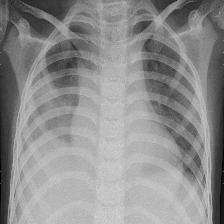

In [ ]:
cv2_imshow(train[0][0])

In [ ]:
train[-1][1]

1

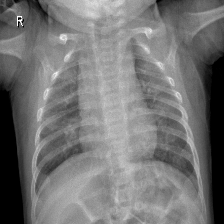

In [ ]:
cv2_imshow(train[-1][0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


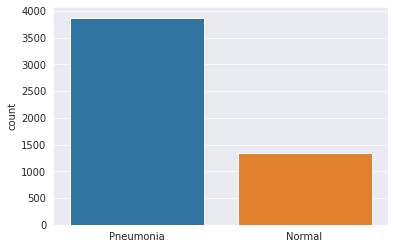

In [ ]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)   

Text(0.5, 1.0, 'NORMAL')

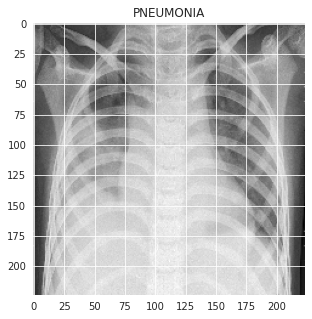

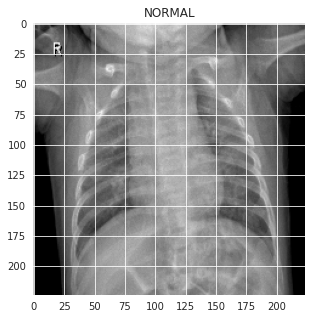

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [ ]:
x_train = []
y_train = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

In [ ]:
type(x_train)

list

In [ ]:
train_x = np.array(x_train)
train_y = np.array(y_train)
test_x = np.array(x_test)
test_y = np.array(y_test)

In [ ]:
train_x.shape,test_x.shape

((5216, 224, 224), (624, 224, 224))

In [ ]:
train_y.shape,test_y.shape

((5216,), (624,))

### Dataset

In [ ]:
class Dataset:
    def __init__(self, num_labeled,train_x,train_y,test_x,test_y):

        # Number labeled examples to use for training
        self.num_labeled = num_labeled

        # Load the dataset
        (self.x_train, self.y_train), (self.x_test,
                                       self.y_test) = (train_x,train_y),(test_x,test_y)

        def preprocess_imgs(x):
            # Rescale [0, 255] grayscale pixel values to [-1, 1]
            x = (x.astype(np.float32) - 127.5) / 127.5
            # Expand image dimensions to width x height x channels
            x = np.expand_dims(x, axis=3)
            return x

        def preprocess_labels(y):
            return y.reshape(-1, 1)

        # Training data
        self.x_train = preprocess_imgs(self.x_train)
        self.y_train = preprocess_labels(self.y_train)

        # Testing data
        self.x_test = preprocess_imgs(self.x_test)
        self.y_test = preprocess_labels(self.y_test)

    def batch_labeled(self, batch_size):
        # Get a random batch of labeled images and their labels
        idx = np.random.randint(0, self.num_labeled, batch_size)
        imgs = self.x_train[idx]
        labels = self.y_train[idx]
        return imgs, labels

    def batch_unlabeled(self, batch_size):
        # Get a random batch of unlabeled images
        idx = np.random.randint(self.num_labeled, self.x_train.shape[0],
                                batch_size)
        imgs = self.x_train[idx]
        return imgs

    def training_set(self):
        x_train = self.x_train[range(self.num_labeled)]
        y_train = self.y_train[range(self.num_labeled)]
        return x_train, y_train

    def test_set(self):
        return self.x_test, self.y_test

In [ ]:
# Number of labeled examples to use (rest will be used as unlabeled)
num_labeled = 1000

dataset = Dataset(num_labeled,train_x,train_y,test_x,test_y)

### Semi-Supervied GAN

In [ ]:
img_rows = 224
img_cols = 224
channels = 1

# Input image dimensions
img_shape = (img_rows, img_cols, channels)

# Size of the noise vector, used as input to the Generator
z_dim = 100

# Number of classes in the dataset
num_classes = 2

### Generator

In [ ]:
def build_generator(z_dim):

    model = Sequential()

    # Reshape input into 7x7x1024 tensor via a fully connected layer
    model.add(Dense(1024 * 7 * 7, input_dim=z_dim))
    model.add(Reshape((7, 7, 1024)))

    # Transposed convolution layer, from 7x7x1024 into 14x14x512 tensor
    model.add(Conv2DTranspose(512, kernel_size=3, strides=2, padding='same'))

    # Batch normalization
    model.add(BatchNormalization())

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))

    # Transposed convolution layer, from 14x14x512 into 28x28x256 tensor
    model.add(Conv2DTranspose(256, kernel_size=3, strides=2, padding='same'))

    # Batch normalization
    model.add(BatchNormalization())

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))

     # Transposed convolution layer, from 28x28x256 into 56x56x128 tensor
    model.add(Conv2DTranspose(128, kernel_size=3, strides=2, padding='same'))

    # Batch normalization
    model.add(BatchNormalization())

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))


    # Transposed convolution layer, from 56x56x128 into 56x56x64 tensor
    model.add(Conv2DTranspose(64, kernel_size=3, strides=1, padding='same'))

    # Batch normalization
    model.add(BatchNormalization())

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))


 # Transposed convolution layer, from 56x56x64 into 112x112*32 tensor
    model.add(Conv2DTranspose(32, kernel_size=3, strides=2, padding='same'))

    # Batch normalization
    model.add(BatchNormalization())

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))

 # Transposed convolution layer, from 112x112*32 into 224x224*1 tensor
    model.add(Conv2DTranspose(1, kernel_size=3, strides=2, padding='same'))

    # Batch normalization
    model.add(BatchNormalization())

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))

    # Output layer with tanh activation
    model.add(Activation('tanh'))

    print(model.summary())
    return model

### Discriminator

In [ ]:
def build_discriminator_net(img_shape):

    model = Sequential()

    # Convolutional layer, from 224x224x1 into 112x112x32 tensor
    model.add(
        Conv2D(32,
               kernel_size=3,
               strides=2,
               input_shape=img_shape,
               padding='same'))

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))

    # Convolutional layer, from 112x112x32 into 56x56x64 tensor
    model.add(
        Conv2D(64,
               kernel_size=3,
               strides=2,
               input_shape=img_shape,
               padding='same'))

    # Batch normalization
    model.add(BatchNormalization())

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))

     # Convolutional layer, from 56x56x64 into 28*28*128 tensor
    model.add(
        Conv2D(128,
               kernel_size=3,
               strides=2,
               input_shape=img_shape,
               padding='same'))

    # Batch normalization
    model.add(BatchNormalization())

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))



    # Convolutional layer, from 28x28x128 into 14x14x256 tensor
    model.add(
        Conv2D(256,
               kernel_size=3,
               strides=2,
               input_shape=img_shape,
               padding='same'))

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))

    # Convolutional layer, from 14x14x256 into 7x7x512 tensor
    model.add(
        Conv2D(512,
               kernel_size=3,
               strides=2,
               input_shape=img_shape,
               padding='same'))

    # Batch normalization
    model.add(BatchNormalization())

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))


    # Convolutional layer, from 7x7x512 tensor into 3x3x1024 tensor
    model.add(
        Conv2D(1024,
               kernel_size=3,
               strides=2,
               input_shape=img_shape,
               padding='same'))

    # Batch normalization
    model.add(BatchNormalization())

    # Leaky ReLU activation
    model.add(LeakyReLU(alpha=0.01))

    # Droupout
    model.add(Dropout(0.5))

    # Flatten the tensor
    model.add(Flatten())

    # Fully connected layer with num_classes neurons
    model.add(Dense(num_classes))

    print(model.summary())

    return model

In [ ]:
def build_discriminator_supervised(discriminator_net):

    model = Sequential()

    model.add(discriminator_net)

    # Softmax activation, giving predicted probability distribution over the real classes(0:'PNEUMONIA', 1:'NORMAL')
    model.add(Activation('softmax'))

    return model

In [ ]:
def build_discriminator_unsupervised(discriminator_net):

    model = Sequential()

    model.add(discriminator_net)

    def predict(x):
        # Transform distribution over real classes into a binary real-vs-fake probability
        prediction = 1.0 - (1.0 /
                            (K.sum(K.exp(x), axis=-1, keepdims=True) + 1.0))
        return prediction

    # 'Real-vs-fake' output neuron defined above
    model.add(Lambda(predict))

    return model

### Build the Model

In [ ]:
def build_gan(generator, discriminator):

    model = Sequential()

    # Combined Generator -> Discriminator model
    model.add(generator)
    model.add(discriminator)

    return model

### Discriminator

In [ ]:
# Core Discriminator network:
# These layers are shared during supervised and unsupervised training
discriminator_net = build_discriminator_net(img_shape)

# Build & compile the Discriminator for supervised training
discriminator_supervised = build_discriminator_supervised(discriminator_net)
discriminator_supervised.compile(loss='categorical_crossentropy',
                                 metrics=['accuracy'],
                                 optimizer=Adam())

# Build & compile the Discriminator for unsupervised training
discriminator_unsupervised = build_discriminator_unsupervised(discriminator_net)
discriminator_unsupervised.compile(loss='binary_crossentropy',
                                   optimizer=Adam())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 112, 112, 32)      320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 56, 56, 64)        256       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       73856     
_______________________________________

### Generator

In [ ]:
# Build the Generator
generator = build_generator(z_dim)

# Keep Discriminator’s parameters constant for Generator training
discriminator_unsupervised.trainable = False

# Build and compile GAN model with fixed Discriminator to train the Generator
# Note that we are using the Discriminator version with unsupervised output
gan = build_gan(generator, discriminator_unsupervised)
gan.compile(loss='binary_crossentropy', optimizer=Adam())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50176)             5067776   
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 1024)        0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 512)       4719104   
_________________________________________________________________
batch_normalization_5 (Batch (None, 14, 14, 512)       2048      
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 14, 14, 512)       0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 256)       1179904   
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 256)      

### Training

In [ ]:
supervised_losses = []
iteration_checkpoints = []


def train(iterations, batch_size, sample_interval):

    # Labels for real images: all ones
    real = np.ones((batch_size, 1))

    # Labels for fake images: all zeros
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):

        # -------------------------
        #  Train the Discriminator
        # -------------------------

        # Get labeled examples
        imgs, labels = dataset.batch_labeled(batch_size)

        # One-hot encode labels
        labels = to_categorical(labels, num_classes=num_classes)

        # Get unlabeled examples
        imgs_unlabeled = dataset.batch_unlabeled(batch_size)

        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, z_dim))
        gen_imgs = generator.predict(z)

        # Train on real labeled examples
        d_loss_supervised, accuracy = discriminator_supervised.train_on_batch(imgs, labels)

        # Train on real unlabeled examples
        d_loss_real = discriminator_unsupervised.train_on_batch(
            imgs_unlabeled, real)

        # Train on fake examples
        d_loss_fake = discriminator_unsupervised.train_on_batch(gen_imgs, fake)

        d_loss_unsupervised = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #  Train the Generator
        # ---------------------

        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, z_dim))
        gen_imgs = generator.predict(z)

        # Train Generator
        g_loss = gan.train_on_batch(z, np.ones((batch_size, 1)))

        if (iteration + 1) % sample_interval == 0:

            # Save Discriminator supervised classification loss to be plotted after training
            supervised_losses.append(d_loss_supervised)
            iteration_checkpoints.append(iteration + 1)

            # Output training progress
            print(
                "%d [D loss supervised: %.4f, acc.: %.2f%%] [D loss unsupervised: %.4f] [G loss: %f]"
                % (iteration + 1, d_loss_supervised, 100 * accuracy,
                   d_loss_unsupervised, g_loss))

### Train the Model and Inspect Output
Note that the 'Discrepancy between trainable weights and collected trainable' warning from Keras is expected. It is by design: The Generator's trainable parameters are intentionally held constant during Discriminator training, and vice versa.

In [ ]:
# Set hyperparameters
iterations = 1500 # 8000
batch_size = 32
sample_interval = 50  #800

# Train the SGAN for the specified number of iterations
train(iterations, batch_size, sample_interval)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/tensorflow-1.15.2/python3.7/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/tensorflow-1.15.2/python3.7/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/tensorflow-1.15.2/python3.7/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


50 [D loss supervised: nan, acc.: 100.00%] [D loss unsupervised: 7.6666] [G loss: -0.000000]
100 [D loss supervised: nan, acc.: 100.00%] [D loss unsupervised: 7.6666] [G loss: -0.000000]
150 [D loss supervised: nan, acc.: 100.00%] [D loss unsupervised: 7.6666] [G loss: -0.000000]
200 [D loss supervised: nan, acc.: 100.00%] [D loss unsupervised: 7.6666] [G loss: -0.000000]
250 [D loss supervised: nan, acc.: 100.00%] [D loss unsupervised: 7.6666] [G loss: -0.000000]
300 [D loss supervised: nan, acc.: 100.00%] [D loss unsupervised: 7.6666] [G loss: -0.000000]
350 [D loss supervised: nan, acc.: 100.00%] [D loss unsupervised: 7.6666] [G loss: -0.000000]
400 [D loss supervised: nan, acc.: 100.00%] [D loss unsupervised: 7.6666] [G loss: -0.000000]
450 [D loss supervised: nan, acc.: 100.00%] [D loss unsupervised: 7.6666] [G loss: -0.000000]
500 [D loss supervised: nan, acc.: 100.00%] [D loss unsupervised: 7.6666] [G loss: -0.000000]
550 [D loss supervised: nan, acc.: 100.00%] [D loss unsupervi

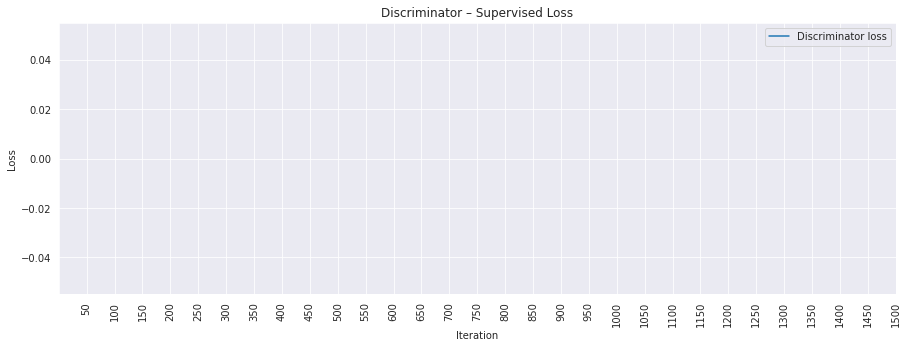

In [ ]:
losses = np.array(supervised_losses)

# Plot Discriminator supervised loss
plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, losses, label="Discriminator loss")

plt.xticks(iteration_checkpoints, rotation=90)

plt.title("Discriminator – Supervised Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

### SGAN Classifier – Training and Test Accuracy

In [ ]:
x, y = dataset.training_set()
y = to_categorical(y, num_classes=num_classes)

# Compute classification accuracy on the training set
_, accuracy = discriminator_supervised.evaluate(x, y)
print("Training Accuracy: %.2f%%" % (100 * accuracy))

1000/1000 [==============================] - 2s 2ms/step
Training Accuracy: 100.00%


In [ ]:
x, y = dataset.test_set()
y = to_categorical(y, num_classes=num_classes)

# Compute classification accuracy on the test set
_, accuracy = discriminator_supervised.evaluate(x, y)
print("Test Accuracy: %.2f%%" % (100 * accuracy))

624/624 [==============================] - 1s 1ms/step
Test Accuracy: 62.50%


### Fully-Supervised Classifier

In [ ]:
# Fully supervised classifier with the same network architecture as the SGAN Discriminator
pneumonia_classifier = build_discriminator_supervised(build_discriminator_net(img_shape))
pneumonia_classifier.compile(loss='categorical_crossentropy',
                         metrics=['accuracy'],
                         optimizer=Adam())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 112, 112, 32)      320       
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
batch_normalization_11 (Batc (None, 56, 56, 64)        256       
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
batch_normalization_12 (Batc (None, 28, 28, 128)      

In [ ]:
imgs, labels = dataset.training_set()

# One-hot encode labels
labels = to_categorical(labels, num_classes=num_classes)

# Train the classifier
training = pneumonia_classifier.fit(x=imgs,
                                y=labels,
                                batch_size=32,
                                epochs=30,
                                verbose=1)
losses = training.history['loss']
accuracies = training.history['accuracy']


Epoch 1/30
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0162 - accuracy: 0.9930
Epoch 2/30
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/30
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/30
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/30
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/30
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/30
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/30
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/30
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/30
1000/1000 [===========================

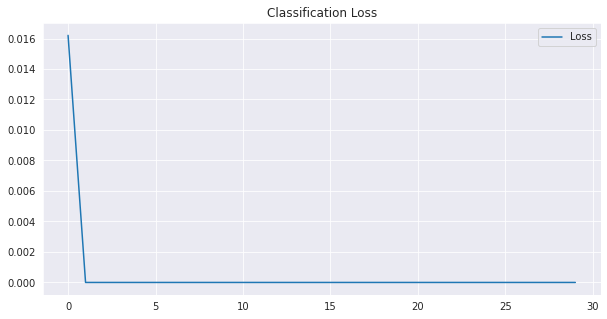

In [ ]:
# Plot classification loss
plt.figure(figsize=(10, 5))
plt.plot(np.array(losses), label="Loss")
plt.title("Classification Loss")
plt.legend()

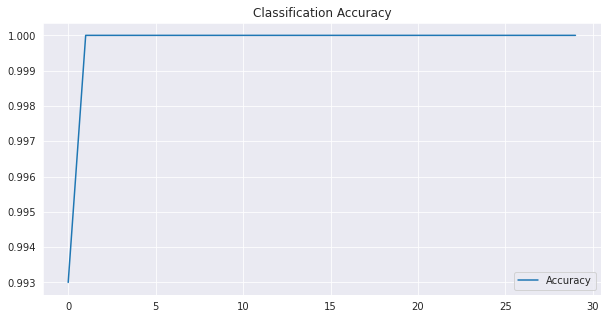

In [ ]:
# Plot classification accuracy
plt.figure(figsize=(10, 5))
plt.plot(np.array(accuracies), label="Accuracy")
plt.title("Classification Accuracy")
plt.legend()

In [ ]:
x, y = dataset.training_set()
y = to_categorical(y, num_classes=num_classes)

# Compute classification accuracy on the training set
_, accuracy = pneumonia_classifier.evaluate(x, y)
print("Training Accuracy: %.2f%%" % (100 * accuracy))

1000/1000 [==============================] - 1s 1ms/step
Training Accuracy: 100.00%


In [ ]:
x, y = dataset.test_set()
y = to_categorical(y, num_classes=num_classes)

# Compute classification accuracy on the test set
_, accuracy = pneumonia_classifier.evaluate(x, y)
print("Test Accuracy: %.2f%%" % (100 * accuracy))

624/624 [==============================] - 1s 1ms/step
Test Accuracy: 62.50%


### Image Display Test Check 

In [ ]:
import cv2

# read image
img = cv2.imread('/content/chest_xray/chest_xray/train/NORMAL/IM-0125-0001.jpeg', cv2.IMREAD_UNCHANGED)

# get dimensions of image
dimensions = img.shape

print(dimensions)

(1125, 1600)


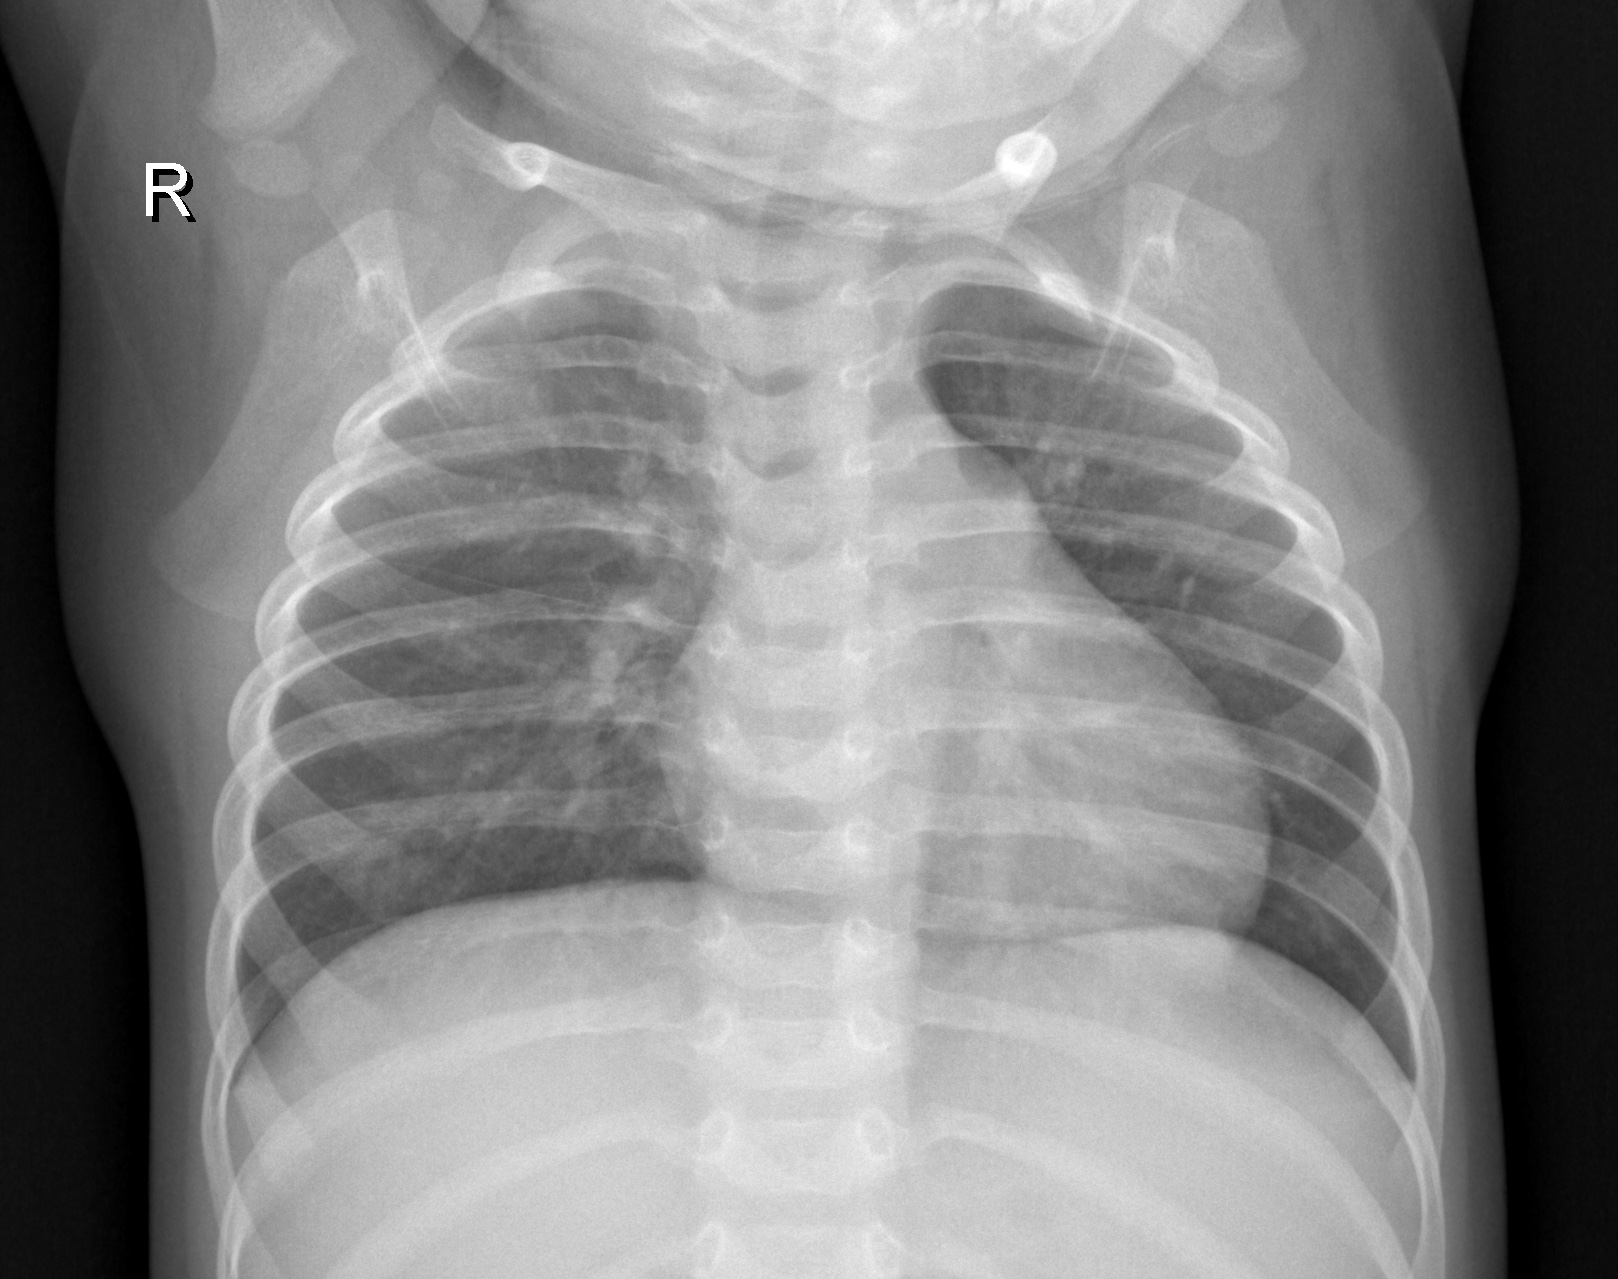

In [ ]:
import cv2

image = cv2.imread('/content/chest_xray/chest_xray/train/NORMAL/IM-0122-0001.jpeg')

cv2_imshow(image)

In [ ]:
image.shape

(1279, 1618, 3)

In [ ]:

image = cv2.imread('/content/chest_xray/chest_xray/train/NORMAL/IM-0162-0001.jpeg')
image.shape

(1430, 1762, 3)

In [ ]:
# /content/chest_xray/chest_xray/train/NORMAL/IM-0140-0001.jpeg

image = cv2.imread('/content/chest_xray/chest_xray/train/NORMAL/IM-0125-0001.jpeg')
image.shape

(1125, 1600, 3)

In [ ]:
# /content/chest_xray/chest_xray/train/NORMAL/IM-0140-0001.jpeg

image = cv2.imread('/content/chest_xray/chest_xray/train/NORMAL/IM-0125-0001.jpeg',0)
image.shape

(1125, 1600)